# TikTok imports

In [1]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import time
from tqdm.auto import tqdm

import requests
from datetime import datetime

In [2]:
!pip install ensembledata
from ensembledata.api import EDClient

In [3]:
# initialize the ensembledata client
client = EDClient("0gEa3xqZAZmB3Ikk")

# get a free token at https://dashboard.ensembledata.com/register
# free trial of 50 units per day for 7 days, starting 23/11/24
#
# costs:
#  - 1 unit = 200 posts in full_hashtag_search :)
#  - 1 unit = 20 posts in hashtag_search
#  - 1 unit = 20 posts in keyword_search or full_keyword_search :(
#  - 1 unit = 30 comments to a post
#  - 1 unit = 30 replies to a comment
#
# documentation available at https://ensembledata.com/apis/docs#tag/Tiktok
# and https://github.com/EnsembleData/tiktok-scraper
# source code available at
# https://github.com/EnsembleData/ensembledata-python/tree/main/ensembledata/api

# Read posts from TikTok

Hashtag search (200 posts at the cost of 1 unit)

In [40]:
# read posts related to an hashtag
result = client.tiktok.full_hashtag_search(
                hashtag = "hurricanemilton", # hashtag name
                days = 150,
                remap_output = True, # False for mobile app, True for web
                max_cursor = 4000) # max number of posts fetched,
                                  # cost is 1 unit per 200 posts

In [45]:
# convert json to dataframe
df = pd.json_normalize(result.data["posts"])

In [46]:
# extract relevant info
df = df[['itemInfos.id', 'itemInfos.createTime', 'itemInfos.authorId',
         'itemInfos.text', 'itemInfos.video.urls', 'itemInfos.shareCount',
         'itemInfos.playCount', 'itemInfos.commentCount']]

# rename columns
df.columns = ['id', 'createTime', 'authorId', 'text', 'video.urls',
              'shareCount', 'playCount', 'commentCount']

# format time to date in string format
df["createTime"] = [str(datetime.fromtimestamp(int(i)).date())
                                                for i in df["createTime"]]

<ipython-input-46-0cb6943ad9c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["createTime"] = [str(datetime.fromtimestamp(int(i)).date())


In [43]:
for i in range(len(df_hashtag)):
  if df_hashtag["createTime"][i]<"2024-09-25":
    df_hashtag=df_hashtag.drop(i)
  if df_hashtag["createTime"][i]>"2024-11-09":
    df_hashtag=df_hashtag.drop(i)

In [49]:
df_hashtag["createTime"].unique()

array(['2024-10-13', '2024-10-09', '2024-10-10', '2024-10-06',
       '2024-10-11', '2024-10-08', '2024-10-12', '2024-10-14',
       '2024-10-07', '2024-10-17', '2024-10-16', '2024-10-20',
       '2024-11-06', '2024-10-19', '2024-11-07', '2024-10-27',
       '2024-10-15', '2024-10-05', '2024-11-09', '2024-10-26',
       '2024-10-18', '2024-11-05', '2024-10-21', '2024-10-29',
       '2024-11-04', '2024-10-31', '2024-11-08', '2024-10-24',
       '2024-10-30', '2024-10-28', '2024-11-03', '2024-10-22',
       '2024-11-02', '2024-10-04'], dtype=object)

In [50]:
display(df_hashtag)

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7425084226372046098,2024-10-13,7383164130561983505,GUYS R WE GONNA DIE??? #fyp #viral #hurricane ...,['https://v45.tiktokcdn-eu.com/9e17c531dee5b7e...,5390,476396,2826
1,7423815010352188705,2024-10-09,7283706303934235680,#milton #hurricane #hurricanemilton #hurricane...,['https://v45.tiktokcdn-eu.com/e4b66377b105784...,2352,2209585,135
2,7423888099505163525,2024-10-09,7179601621067596806,bro this is scary.💀 | ib:@vampire #hurricanemi...,['https://v45.tiktokcdn-eu.com/3473ad80f099bce...,57803,11898788,12449
3,7423970900539739424,2024-10-10,6807560459680629766,Hurricane Milton is here at Walt Disney World!...,['https://v45.tiktokcdn-eu.com/496048870cdedad...,11042,1163336,274
4,7423748908322508064,2024-10-09,7412662885904139297,Hurricane 🌀 Milton in Florida 🇺🇸 today 2024 #h...,['https://v45.tiktokcdn-eu.com/a622d1e6de6343a...,742,871920,112
...,...,...,...,...,...,...,...,...
3404,7423220625067609387,2024-10-08,6820227077867029509,ON ANOTHER EPISODE OF WTFF DID I ORDER ON DOOR...,['https://v77.tiktokcdn-eu.com/b523e9cf13826c8...,67,88458,74
3405,7423850374676761898,2024-10-09,7233779680962266158,makes tiktok to document the time i was right ...,['https://v77.tiktokcdn-eu.com/1acafa7f233b26f...,29,884838,50
3406,7424147331970305323,2024-10-10,6909294315127407621,ALLIGATORS& SHARKS ARE SWIMMING IN THE STREETS...,['https://v77.tiktokcdn-eu.com/dd355ffa6407216...,3869,773525,228
3407,7423887297671695659,2024-10-09,6968296188328788997,"Doing a heroes job fr fr, best song ever #ksi ...",['https://v77.tiktokcdn-eu.com/7c6b8bed0626b5f...,3208,162842,356


## Save and download the csv file

In [51]:
# save
df_hashtag.to_csv('milton_tiktok_hashtag_posts1.csv', index=False)

In [52]:

from google.colab import files

# Scarica il file
files.download('milton_tiktok_hashtag_posts1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Read comments from TikTok

In [68]:
df_hashtag = pd.read_csv('milton_tiktok_hashtag_posts1.csv')

In [69]:
df_hashtag["createTime"].unique()

array(['2025-01-06', '2024-10-10', '2024-10-17', '2024-10-09',
       '2025-01-20', '2024-10-11', '2024-10-16', '2024-10-07',
       '2024-10-08', '2024-10-12', '2024-10-13', '2024-10-06',
       '2024-10-20', '2024-11-15', '2024-11-07', '2024-11-06',
       '2024-10-27', '2024-10-14', '2024-10-19', '2024-10-18',
       '2024-10-05', '2024-10-15', '2025-01-11', '2024-11-11',
       '2025-01-14', '2024-11-05', '2024-11-09', '2024-10-26',
       '2024-11-20', '2024-10-21', '2024-12-24', '2024-11-08',
       '2024-11-04', '2024-11-29', '2024-12-26', '2024-10-31',
       '2024-10-29', '2025-01-12', '2024-11-10', '2024-10-30',
       '2024-10-24', '2024-10-28', '2024-11-03', '2024-12-01',
       '2024-12-06', '2024-12-29', '2024-10-22', '2024-11-19',
       '2024-11-02', '2024-10-04', '2024-11-26', '2024-12-18',
       '2024-11-23'], dtype=object)

In [70]:
for i in range(len(df_hashtag)):
  if df_hashtag["createTime"][i]<"2024-09-25":
    df_hashtag=df_hashtag.drop(i)
  if df_hashtag["createTime"][i]>"2024-11-09":
    df_hashtag=df_hashtag.drop(i)

In [71]:
df_hashtag["createTime"].unique()

array(['2024-10-10', '2024-10-17', '2024-10-09', '2024-10-11',
       '2024-10-16', '2024-10-07', '2024-10-08', '2024-10-12',
       '2024-10-13', '2024-10-06', '2024-10-20', '2024-11-07',
       '2024-11-06', '2024-10-27', '2024-10-14', '2024-10-19',
       '2024-10-18', '2024-10-05', '2024-10-15', '2024-11-05',
       '2024-11-09', '2024-10-26', '2024-10-21', '2024-11-08',
       '2024-11-04', '2024-10-31', '2024-10-29', '2024-10-30',
       '2024-10-24', '2024-10-28', '2024-11-03', '2024-10-22',
       '2024-11-02', '2024-10-04'], dtype=object)

Comments search

In [72]:
# order by comment count
df_hashtag = df_hashtag.sort_values(by=['commentCount'], ascending=False).reset_index(drop=True)

# delete posts with less than 30 comments
df_hashtag = df_hashtag[df_hashtag['commentCount']>=30]

# state how many
print(f'{len(df_hashtag)} posts for hashtags with more than 30 comments')


3322 posts for hashtags with more than 30 comments


In [73]:
display(df_hashtag)

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7423806833598467370,2024-10-09,7253195694756119595,🚨🗣️📣 #Breaking: #Florida #HighwayPatrol (FHP) ...,['https://v45.tiktokcdn-eu.com/46b02a2587a35f1...,95789,7075494,51556
1,7423392429912378667,2024-10-08,7008705098881483781,I CANT LEAVE… Sure! #H#HurricaneMilton #M#Milt...,['https://v77.tiktokcdn-eu.com/ebc89b4979d11ff...,4974,2343281,44400
2,7422814373627940139,2024-10-06,7062794043685045294,Replying to @cathy76ny We are Zone A for evacu...,['https://v16m.tiktokcdn-eu.com/c3a07814555f39...,18664,10455787,42849
3,7423940143821770026,2024-10-10,6853542919795590149,"Madame VICE PRESIDENT, you got the whole count...",['https://v39-dynamic-eu-fra1.tiktokcdn-eu.com...,67510,2967515,38741
4,7423123307991502123,2024-10-07,54068006569377792,White House Press Sec. Karine Jean-Pierre addr...,['https://v45.tiktokcdn-eu.com/11bec37ca6778f7...,49061,9513365,34833
...,...,...,...,...,...,...,...,...
3317,7423436315548486958,2024-10-08,7358215378482644010,draft from yesterday right before we got the e...,['https://v16m.tiktokcdn-eu.com/564087018daedc...,65,287920,34
3318,7423553309908225322,2024-10-08,6813401478993069062,Having fun while prepping for hurricane milton...,['https://v45.tiktokcdn-eu.com/66e94ca1d5ef036...,135,196407,33
3319,7422880240415821099,2024-10-07,7358215378482644010,milton please cancel your trip for this week!!...,['https://v16m.tiktokcdn-eu.com/3954b7f52efcd6...,140,270345,33
3320,7423961969440460063,2024-10-10,6811573273562809349,Crying 🥺 Love watching my friends become mamas...,['https://v16m.tiktokcdn-eu.com/08215a3d4ab2ef...,13,133961,31


In [74]:
df_hashtag['createTime'].unique()

array(['2024-10-09', '2024-10-08', '2024-10-06', '2024-10-10',
       '2024-10-07', '2024-10-11', '2024-10-12', '2024-10-13',
       '2024-10-14', '2024-10-16', '2024-10-15', '2024-10-20',
       '2024-11-04', '2024-10-17', '2024-10-05', '2024-10-18',
       '2024-11-06', '2024-11-07', '2024-10-21', '2024-10-19',
       '2024-10-27', '2024-10-31', '2024-10-24', '2024-10-30',
       '2024-11-05', '2024-10-04', '2024-11-08', '2024-11-09',
       '2024-10-29', '2024-11-03', '2024-11-02', '2024-10-26',
       '2024-10-28', '2024-10-22'], dtype=object)

In [75]:
len(df_hashtag['createTime'].unique()) # we take the comments of 26 days

34

In [76]:
df_hashtag = df_hashtag.loc[df_hashtag.groupby('createTime')['commentCount'].idxmax()]

In [77]:
# order df_hashtag by date
df_hashtag = df_hashtag.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

df_hashtag

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7421965835071180062,2024-10-04,7159196409403556906,10/4 pm. latest GFS has possible hurricane Tue...,['https://v45.tiktokcdn-eu.com/d874276342da953...,5577,527233,673
1,7422329569190874398,2024-10-05,7159196409403556906,NaN,['https://v58.tiktokcdn-eu.com/video/tos/maliv...,19077,2252822,4165
2,7422814373627940139,2024-10-06,7062794043685045294,Replying to @cathy76ny We are Zone A for evacu...,['https://v16m.tiktokcdn-eu.com/c3a07814555f39...,18664,10455787,42849
3,7423123307991502123,2024-10-07,54068006569377792,White House Press Sec. Karine Jean-Pierre addr...,['https://v45.tiktokcdn-eu.com/11bec37ca6778f7...,49061,9513365,34833
4,7423392429912378667,2024-10-08,7008705098881483781,I CANT LEAVE… Sure! #H#HurricaneMilton #M#Milt...,['https://v77.tiktokcdn-eu.com/ebc89b4979d11ff...,4974,2343281,44400
5,7423806833598467370,2024-10-09,7253195694756119595,🚨🗣️📣 #Breaking: #Florida #HighwayPatrol (FHP) ...,['https://v45.tiktokcdn-eu.com/46b02a2587a35f1...,95789,7075494,51556
6,7423940143821770026,2024-10-10,6853542919795590149,"Madame VICE PRESIDENT, you got the whole count...",['https://v39-dynamic-eu-fra1.tiktokcdn-eu.com...,67510,2967515,38741
7,7424419750303878408,2024-10-11,7046365810935415835,these are our last days ......... #hurricanemi...,['https://v77.tiktokcdn-eu.com/d23a1a420197591...,71727,9045849,30942
8,7424686319395294470,2024-10-12,6828728290124792837,"Se isso já foi extremamente assustador, imagin...",['https://v77.tiktokcdn-eu.com/6ddc008c7256def...,40014,8061660,16958
9,7425319802358582561,2024-10-13,7064214110066902022,just happend 20 mins ago #hurricanemilton #leb...,['https://v77.tiktokcdn-eu.com/211f73296aa9485...,6302,2282899,9263


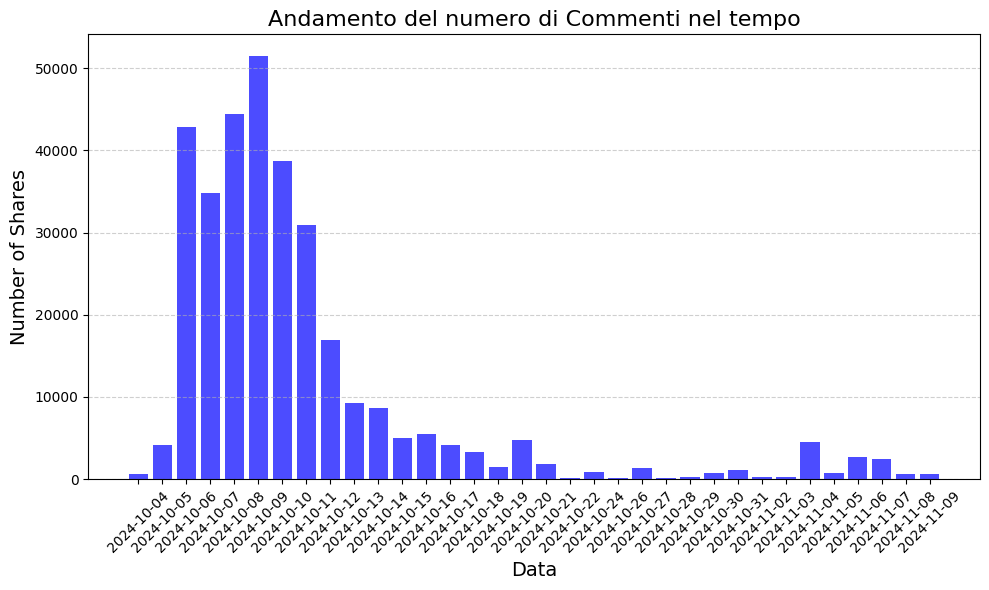

In [78]:
plt.figure(figsize=(10, 6))
plt.bar(df_hashtag["createTime"], df_hashtag["commentCount"], color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Andamento del numero di Commenti nel tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Number of Shares', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [79]:
len(df_hashtag)

34

In [80]:
# set search criteria
comments_to_retrieve = 30 # 30 is a safe number = 1 credit!

comments = list()
for i in range(len(df_hashtag)):
    aweme_id = df_hashtag["id"][i]
    cursor = None
    for _ in range(int(comments_to_retrieve/30)):
        result = client.tiktok.post_comments(
            aweme_id = aweme_id,
            cursor = cursor
        )
        comments.extend(result.data["comments"])
        cursor = result.data.get("nextCursor")
        if cursor is None:
            break

In [81]:
# convert json to dataframe
df = pd.json_normalize(comments)

# extract relevant info
df = df[['aweme_id', 'cid', 'create_time', 'text', 'reply_comment_total']]

# format time to date in string format
df["create_time"] = [str(datetime.fromtimestamp(int(i)).date())
                                                for i in df["create_time"]]

# order by number of replies
df = df.sort_values(by=['reply_comment_total'], ascending=False).reset_index(drop=True)

# save
df_comments = df
df_comments.to_csv('ian_tiktok_hashtag_comments.csv', index=False)

In [82]:
df_comments

,aweme_id,cid,create_time,text,reply_comment_total
0,7424419750303878408,7424772903915258631,2024-10-12,1. milton - due to heating up of earth.\n2. sa...,1633
1,7422814373627940139,7422835309627097887,2024-10-07,if you can make it to SC my home is open to yo...,693
2,7426167450623954207,7426193868028527403,2024-10-16,"Question, why is it the American government al...",426
3,7423940143821770026,7424410768140124961,2024-10-11,Trump gave about 25 millions to home owners wh...,388
4,7423123307991502123,7423173584540123946,2024-10-07,How are they gonna help us??? They don’t have ...,371
...,...,...,...,...,...
608,7432883698195795242,7433243465687335723,2024-11-04,gone on shake them sheets out..😂,0
609,7432883698195795242,7434387988442284830,2024-11-07,I will change everything I don't care what tim...,0
610,7432883698195795242,7434361939549930286,2024-11-07,Lol I hate that but I still eat potato chips i...,0
611,7425693857322437921,7459884818122916641,2025-01-14,HAVE U SEEN THE LA AND CALIFORNIA,0


## Save and download comments file

In [90]:
# save
df_comments.to_csv('milton_comments.csv', index=False)

from google.colab import files

# Scarica il file
files.download('milton_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>